In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
N = 100
n = 5
x = np.linspace(0, np.pi, N)
xp = np.linspace(0, np.pi, n)
y = np.sin(x)
yp = np.sin(xp)
z = np.zeros(N)
zp = np.zeros(n)
o = np.ones(N)
op = np.ones(n)

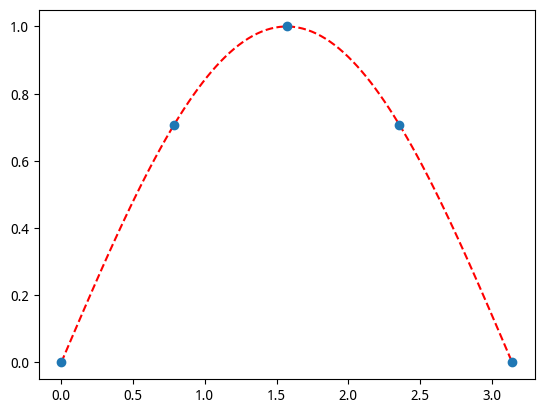

In [3]:
plt.plot(x, y, 'r--')
plt.plot(xp, yp, 'o')

In [4]:
def lag(xp, x, i):
    r1 = np.prod(np.array(x) - [*xp[0:i], *xp[i + 1:]])
    r2 = np.prod(xp[i] - [*xp[0:i], *xp[i + 1:]])
    return r1 / r2

In [9]:
N = len(x)
l0 = np.zeros(N)
for i in range(0, N):
    l0[i] = lag(xp, x[i], 0)    

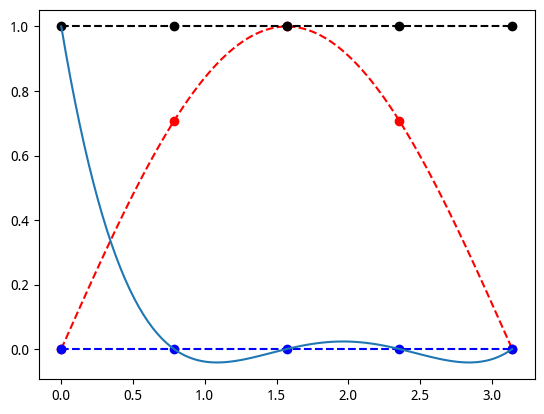

In [10]:
plt.plot(x, y, 'r--')
plt.plot(xp, yp, 'ro')
plt.plot(x, z, 'b--')
plt.plot(xp, zp, 'bo')
plt.plot(x, o, 'k--')
plt.plot(xp, op, 'ko')
plt.plot(x, l0)

In [11]:
l1 = np.zeros(N)
for i in range(0, N):
    l1[i] = lag(xp, x[i], 1)
l2 = np.zeros(N)
for i in range(0, N):
    l2[i] = lag(xp, x[i], 2)
l3 = np.zeros(N)
for i in range(0, N):
    l3[i] = lag(xp, x[i], 3)
l4 = np.zeros(N)
for i in range(0, N):
    l4[i] = lag(xp, x[i], 4)   

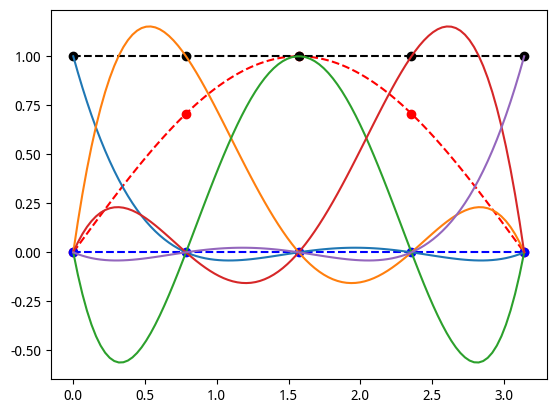

In [12]:
plt.plot(x, y, 'r--')
plt.plot(xp, yp, 'ro')
plt.plot(x, z, 'b--')
plt.plot(xp, zp, 'bo')
plt.plot(x, o, 'k--')
plt.plot(xp, op, 'ko')
plt.plot(x, l0)
plt.plot(x, l1)
plt.plot(x, l2)
plt.plot(x, l3)
plt.plot(x, l4)

In [ ]:
def Runge(x):
    return 1.0 / (1.0 + x**2)

In [ ]:
xp = np.linspace(-5, 5, N)
yp = Runge(xp)
plt.plot(xp, yp)

这是一个看上去很正经的函数啊！

In [ ]:
n = 5
xp = np.linspace(-5, 5, n)
yp = Runge(xp)
l = np.zeros((n, N))
x = np.linspace(-5, 5, N)
for i in range(0, n):
    for j in range(0, N):
        l[i][j] = lag(xp, x[j], i)
y = np.zeros(N)
for j in range(0, N):
    for i in range(0, n):
        y[j] = y[j] +  l[i][j] * yp[i]   

In [ ]:
plt.plot(x, Runge(x), '--')
plt.plot(x, y, 'b')
plt.plot(xp, yp, 'ro')

一定是阶数太低！吗？

In [ ]:
n = 10
xp = np.linspace(-5, 5, n)
yp = Runge(xp)
l = np.zeros((n, N))
x = np.linspace(-5, 5, N)
for i in range(0, n):
    for j in range(0, N):
        l[i][j] = lag(xp, x[j], i)
y = np.zeros(N)
for j in range(0, N):
    for i in range(0, n):
        y[j] = y[j] +  l[i][j] * yp[i]   
plt.plot(x, Runge(x), '--')
plt.plot(x, y, 'b')
plt.plot(xp, yp, 'ro')

坚持下去，就有希望！

In [ ]:
n = 20
xp = np.linspace(-5, 5, n)
yp = Runge(xp)
l = np.zeros((n, N))
x = np.linspace(-5, 5, N)
for i in range(0, n):
    for j in range(0, N):
        l[i][j] = lag(xp, x[j], i)
y = np.zeros(N)
for j in range(0, N):
    for i in range(0, n):
        y[j] = y[j] +  l[i][j] * yp[i]   
plt.plot(x, Runge(x), '--')
plt.plot(x, y, 'b')
plt.plot(xp, yp, 'ro')

洗洗睡吧。。。

# Chebyshev 多项式

In [ ]:
n = 20
N = 1000
xp = np.linspace(-1, 1, n)
l = np.zeros((n, N))
x = np.linspace(-1, 1, N)
#for i in range(0, n):
#    for j in range(0, N):
#        l[i][j] = lag(xp, x[j], i)
zp = np.zeros(N)
op = np.ones(N)
#for i in range(n):
#    plt.plot(x, l[i])
#plt.plot(xp, zp, 'bo')
#plt.plot(xp, op, 'bo')
T = np.cos(n * np.arccos(x))
plt.plot(x, T, 'k--', x, op, 'r--',x , -op, 'r--', x, zp, 'b')

看一下 Chebyshev 多项式的直观。它的振幅就不会离开 $[-1, 1]$, 注意多项式零点也是确保多项式唯一性的一组数据，因此这样取多项式零点，就可以确保这组多项式是有界的。

In [ ]:
n = 40  # -> 40
xp = np.linspace(-5, 5, n)
for i in range(n):
    xp[i] = 5 * np.cos((2 * i + 1) / (2 * n) * np.pi)
yp = Runge(xp)
l = np.zeros((n, N))
x = np.linspace(-5, 5, N)
for i in range(0, n):
    for j in range(0, N):
        l[i][j] = lag(xp, x[j], i)
y = np.zeros(N)
for j in range(0, N):
    for i in range(0, n):
        y[j] = y[j] +  l[i][j] * yp[i]   
plt.plot(x, np.abs(Runge(x) - y), '--')
#plt.plot(x, y, 'b')
#plt.plot(xp, yp, 'ro')

一致性这不就来了么...

观察一下分段线性插值, 就是把插值区间分割成很多小区间, 每一个小区间上都做一个线性(1次)多项式插值:

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)

In [ ]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
ynew = np.cos(-xnew**2/9.0)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, ynew, '--')
plt.legend(['data', 'linear', 'real'], loc='best')
plt.show()

在小区间的端点上, 导数不连续, 但随着小区间的加细, 一致收敛性是显然的, 这种方式经常用于计算机绘图. 

In [ ]:
x = np.linspace(0, 10, num=41, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
xnew = np.linspace(0, 10, num=401, endpoint=True)
ynew = np.cos(-xnew**2/9.0)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, ynew, '--')
plt.legend(['data', 'linear', 'real'], loc='best')
plt.show()

观察一下这个误差分布, 合理么?

In [ ]:
plt.plot(x, f(x) - y, 'o', xnew, f(xnew) - ynew, '-')
plt.legend(['data', 'error'], loc='best')
plt.show()

先看一下分段线性逼近对 Runge 函数, 

In [ ]:
x = np.linspace(-10, 10, num=11, endpoint=True)
y = Runge(x)
f = interp1d(x, y)
xnew = np.linspace(-10, 10, num=401, endpoint=True)
ynew = Runge(xnew)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, ynew, '--')
plt.legend(['data', 'linear', 'real'], loc='best')
plt.show()

好在还是一致收敛的.

In [ ]:
x = np.linspace(-10, 10, num=101, endpoint=True)
y = Runge(x)
f = interp1d(x, y)
xnew = np.linspace(-10, 10, num=401, endpoint=True)
ynew = Runge(xnew)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, ynew, '--')
plt.legend(['data', 'linear', 'real'], loc='best')
plt.show()

误差也验证了.

In [ ]:
plt.plot(x, f(x) - y, 'o', xnew, f(xnew) - ynew, '-')
plt.legend(['data', 'error'], loc='best')
plt.show()

样条对 Runge 函数的拟合, 看出问题了么? 未必一定就很好啊.

In [ ]:
x = np.linspace(-10, 10, num=11, endpoint=True)
y = Runge(x)
f2 = interp1d(x, y, kind='cubic')
plt.plot(x, y, 'o', xnew, f2(xnew), '-', xnew, ynew, '--')
plt.legend(['data', 'cubic', 'real'], loc='best')
plt.show()

注意这个不是 Runge 现象, 这个其实更像是为了平衡应力, 样条不得不扭曲起来, 因为这里应力过大, 不扭曲没有足够的弹性力来平衡. 这里没有提供边界条件, 默认用的是非节点条件, 理论上自然样条会施放一些应力, 但实际上区别不大:

In [ ]:
from scipy.interpolate import CubicSpline
f3 = CubicSpline(x, y, bc_type='natural')
plt.plot(x, y, 'o', xnew, f2(xnew), '-', xnew, ynew, '--')
plt.legend(['data', 'cubic', 'real'], loc='best')
plt.show()

从区别看, 边界上确实有一些调整, 但中间还是一样地扭结. 

In [ ]:
plt.plot(x, f(x) - y, 'o', xnew, f2(xnew) - f3(xnew), '-')
plt.legend(['data', 'error'], loc='best')
plt.show()

好在不论什么样条, 加密了是一致收敛的.

In [ ]:
x = np.linspace(-10, 10, num=21, endpoint=True)
y = Runge(x)
f2 = CubicSpline(x, y)
plt.plot(x, y, 'o', xnew, f2(xnew), '-', xnew, ynew, '--')
plt.legend(['data', 'cubic', 'real'], loc='best')
plt.show()

误差分布:

In [ ]:
plt.plot(x, f(x) - y, 'o', xnew, f2(xnew) - ynew, '-')
plt.legend(['data', 'error'], loc='best')
plt.show()

画个心形曲线, 参数方程如下:
$$
\begin{array}{rcl}
x &=& 16 \sin^3 t \\
y &=& 13 \cos t - 5 \cos 2t - 2 \cos 3t  - \cos 4t
\end{array}
$$

In [ ]:
t = np.linspace(0, 2.0 * np.pi, num=15, endpoint=True)
x = 16.0 * np.sin(t) ** 3.0
y = 13.0 * np.cos(t) - 5.0 * np.cos(2.0 * t) - 2.0 * np.cos(3.0 * t) - np.cos(4.0 * t)
fx = CubicSpline(t, x, bc_type='periodic')
fy = CubicSpline(t, y, bc_type='periodic')
tnew = np.linspace(0, 2.0 * np.pi, num=401, endpoint=True)
xnew = 16.0 * np.sin(tnew) ** 3.0
ynew = 13.0 * np.cos(tnew) - 5.0 * np.cos(2.0 * tnew) - 2.0 * np.cos(3.0 * tnew) - np.cos(4.0 * tnew)
plt.plot(x, y, 'o', xnew, ynew, 'g--', fx(tnew), fy(tnew), 'r')
plt.show()

可以看到, 9 个型值点, 效果还不好, 但 11 个点效果就不错了. 而 15 个点几乎看不出有什么问题. 也就是说, 这样的一个比较复杂的曲线, 我们可以只存 11 个点把它还原的不错, 而且还能无级缩放不会失真, 也不会锯齿. 